Please also refer these sites to visualize decision tree:

https://rosettacode.org/wiki/Visualize_a_tree<br>
https://mljar.com/blog/visualize-decision-tree/<br>
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz
from dtreeviz.trees import dtreeviz
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
# Prepare the iris data data
# We will train a DecisionTreeClassifier on iris dataset
# The Iris flower data set or Fisher's Iris data set is a 
# multivariate data set introduced by the British statistician and biologist Ronald Fisher
# in his 1936 paper The use of multiple measurements in taxonomic problems as an example of 
# linear discriminant analysis
# Please also check this site to learn the Iris Data set: https://archive.ics.uci.edu/ml/datasets/iris 

iris = datasets.load_iris() 
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(random_state=321) # I am using default hyper-parmaters setting for this example
model = clf.fit(X, y)

In [ ]:
#-- slide 4
# 1 Visulization with export_text
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



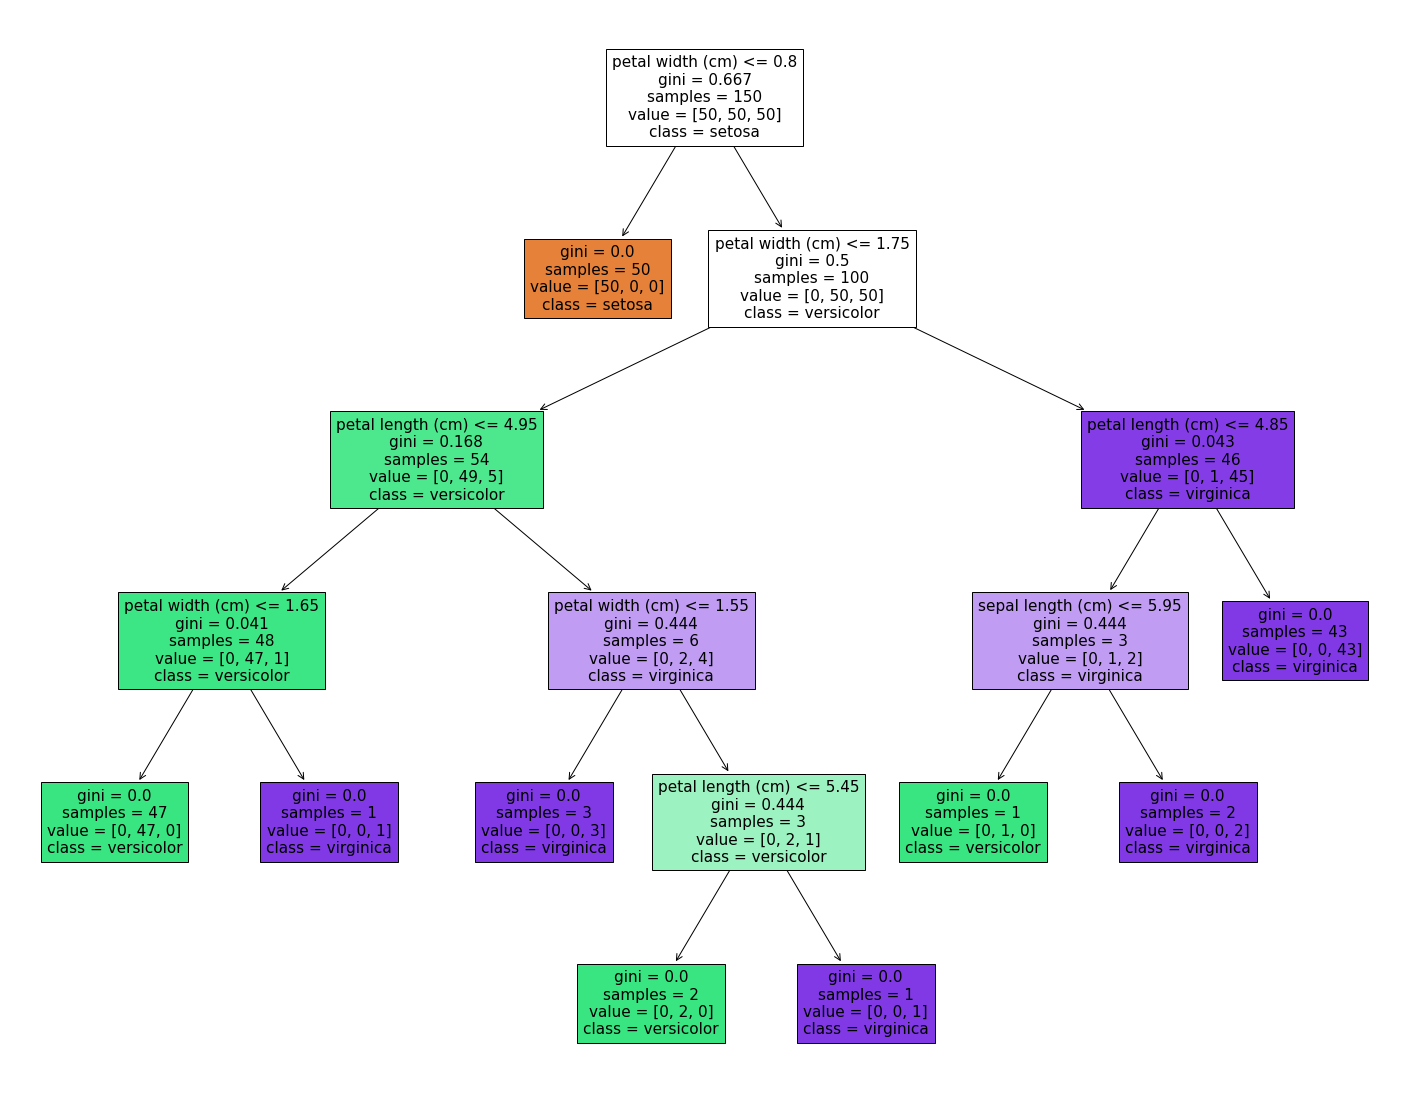

In [ ]:
#-- slide 4
# 2 Visulization with plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

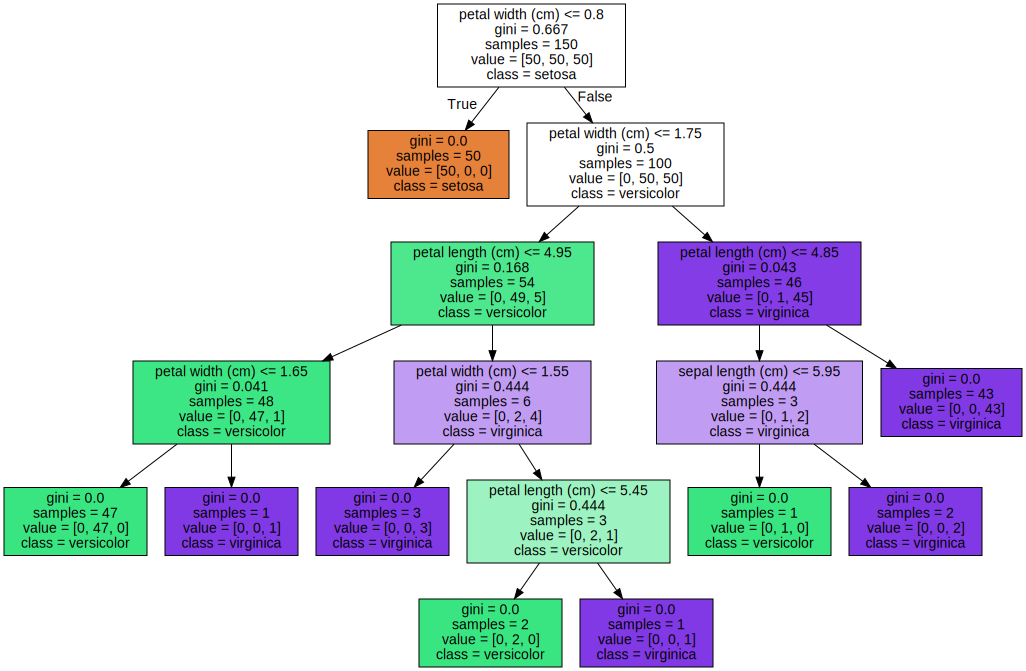

In [ ]:
#-- slide 4
# 3 Visualize with graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data) 
graph

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


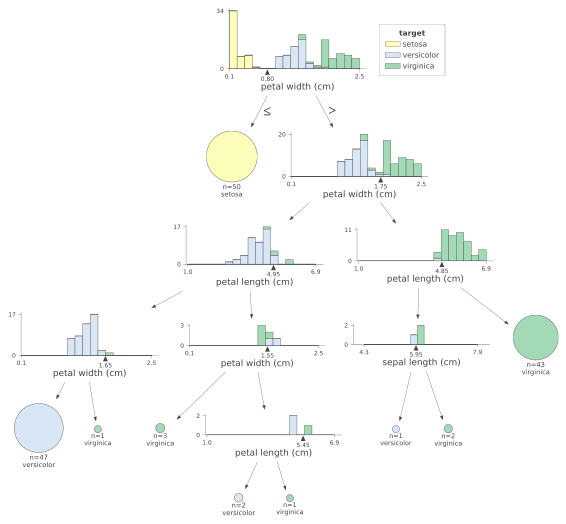

In [ ]:
#-- slide 4
# 4 Visualize with dtreeviz
viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

In [ ]:
#-- slide 4
#5 Four visualize methods with DecisionTreeRegressor
boston = datasets.load_boston()
X = boston.data
y = boston.target 
regr = DecisionTreeRegressor(max_depth=3, random_state=321)
model = regr.fit(X, y)

#5-1
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_0 <= 2.74
|   |   |   |--- value: [45.90]
|   |   |--- feature_0 >  2.74
|   |   |   |--- value: [21.90]

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further detai

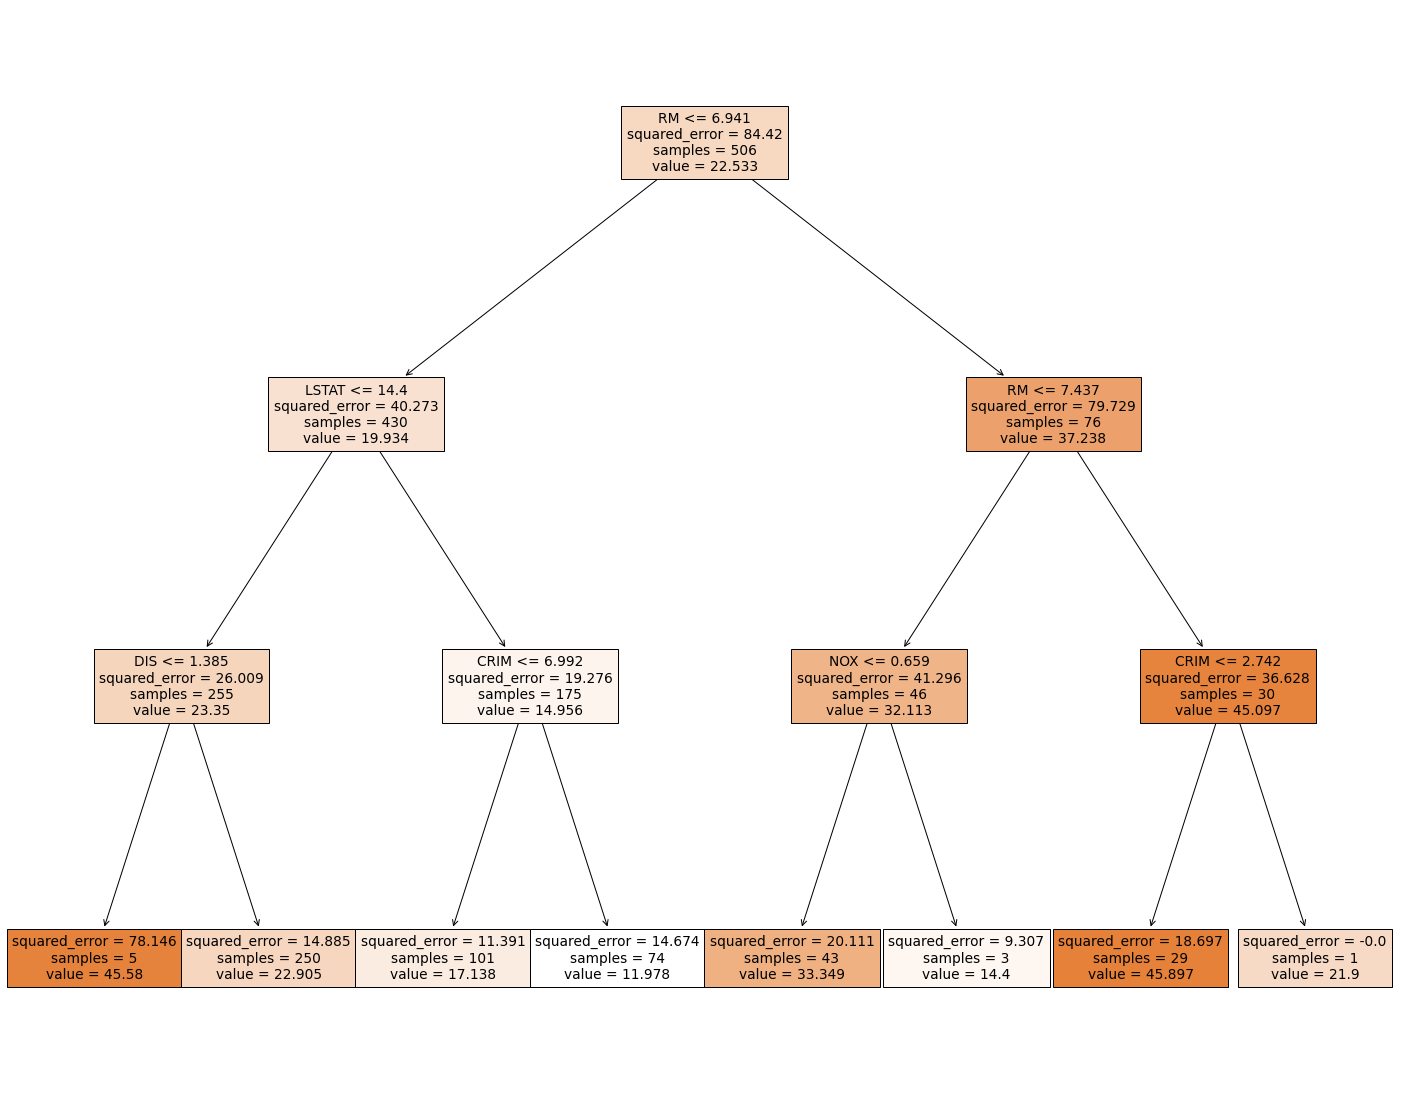

In [ ]:
#5-2
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=boston.feature_names, filled=True)

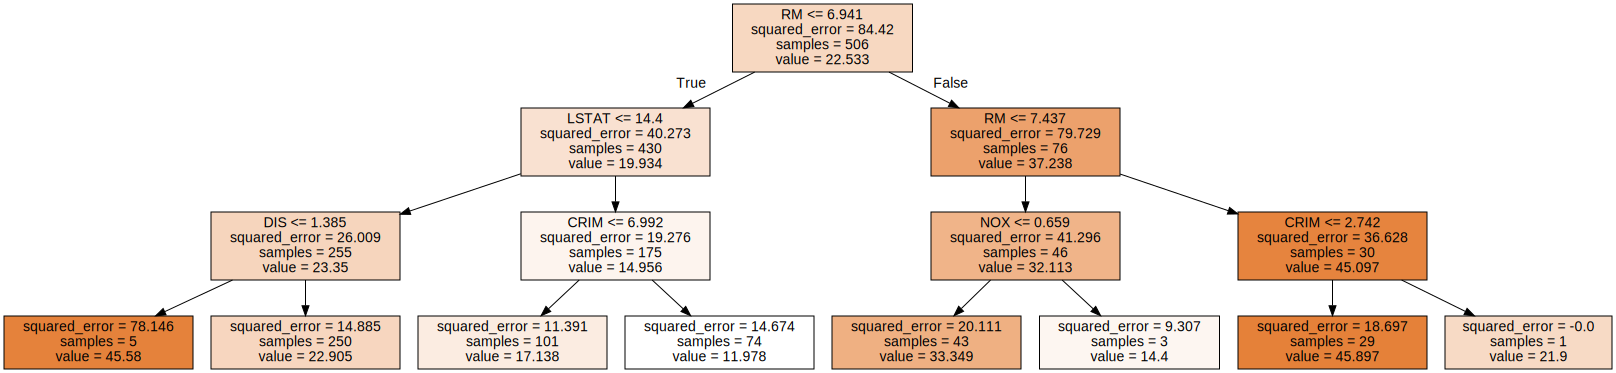

In [ ]:
#-- slide 4
#5-3
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=boston.feature_names,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

The ISLR R package (corresponding to the ISLR textbook), contains data (Hitters) on Major League Baseball players for the 1986-1987 season.

In [ ]:
# Download data from the Github site (baseball player's salary data)
# Fitting with only numerical variables
url_data = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/9463d8c784b5cc9a271375e901524d4f1cf7378d/Notebooks/Data/Hitters.csv'
data_csv = pd.read_csv(url_data)
data_csv.dropna(inplace=True) # mask out NaN data
data_csv.drop(columns=['Division', 'League','NewLeague'], inplace=True) # ignore the catagorical vars.
                                                               # we can consider the categorical vars using one-hot encoder

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


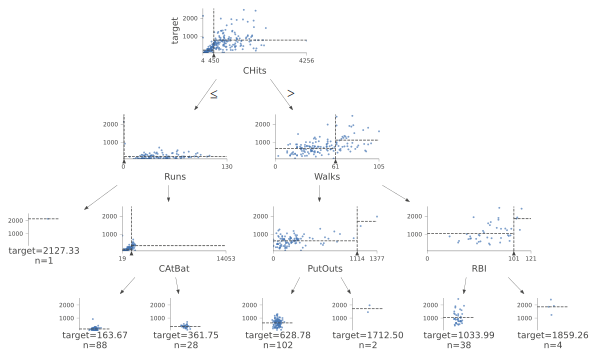

In [ ]:
X = data_csv.drop(columns=['Salary', 'Unnamed: 0'])
y = data_csv['Salary']

regr = DecisionTreeRegressor(max_depth=3, random_state=321)
model = regr.fit(X, y)

viz = dtreeviz(regr, X, y,
                target_name="target",
                feature_names=X.columns)
viz

In [ ]:
#-- slide 8
# Another way to load the example data using sklearn datasets
# Fitting with categorical and numerical variables
regr = tree.DecisionTreeRegressor(max_depth=3)
boston = datasets.load_boston()

X_train = boston.data
y_train = boston.target
regr.fit(X_train, y_train)

viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='price',  # this name will be displayed at the leaf node
               feature_names=boston.feature_names,
               title="Boston house price data set regression",
               title_fontsize=15,
               colors = {"title":"blue"}
              )
viz
viz.save("dtree.svg")

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

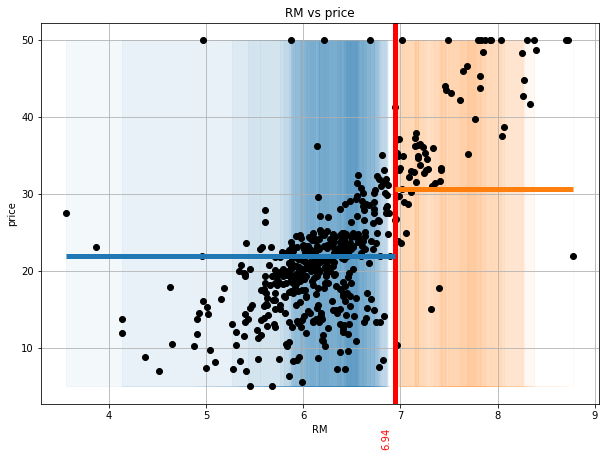

In [ ]:
# slide 10
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
feature_names = boston.feature_names
RM = X_train[:, np.argwhere(feature_names=='RM')[0]]
y_train
plt.plot(RM, y_train, 'o', color='k')
ax.set(xlabel='RM', ylabel='price', title='RM vs price')
ax.fill_between(RM.reshape(-1,), min(y_train), max(y_train), 
where=RM.reshape(-1,)<=6.94, alpha=0.05, color='C0', interpolate=False)

ax.fill_between(RM.reshape(-1,), min(y_train), max(y_train), 
where=RM.reshape(-1,)>6.94, alpha=0.05, color='C1', interpolate=False)


l1 = np.mean(y_train[np.argwhere(RM<=6.94),])
l2 = np.mean(y_train[np.argwhere(RM>6.94),])

plt.axvline(x=6.94, color='r', linewidth=5)
plt.text(6.8,-3,'6.94',rotation=90, color='r')
plt.hlines(y=l1, xmin=min(RM), xmax=6.94, color='C0', linewidth=5)
plt.hlines(y=l2, xmin=6.94, xmax=max(RM), color='C1', linewidth=5)
plt.rcParams.update({'font.size': 22})
ax.grid()


/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


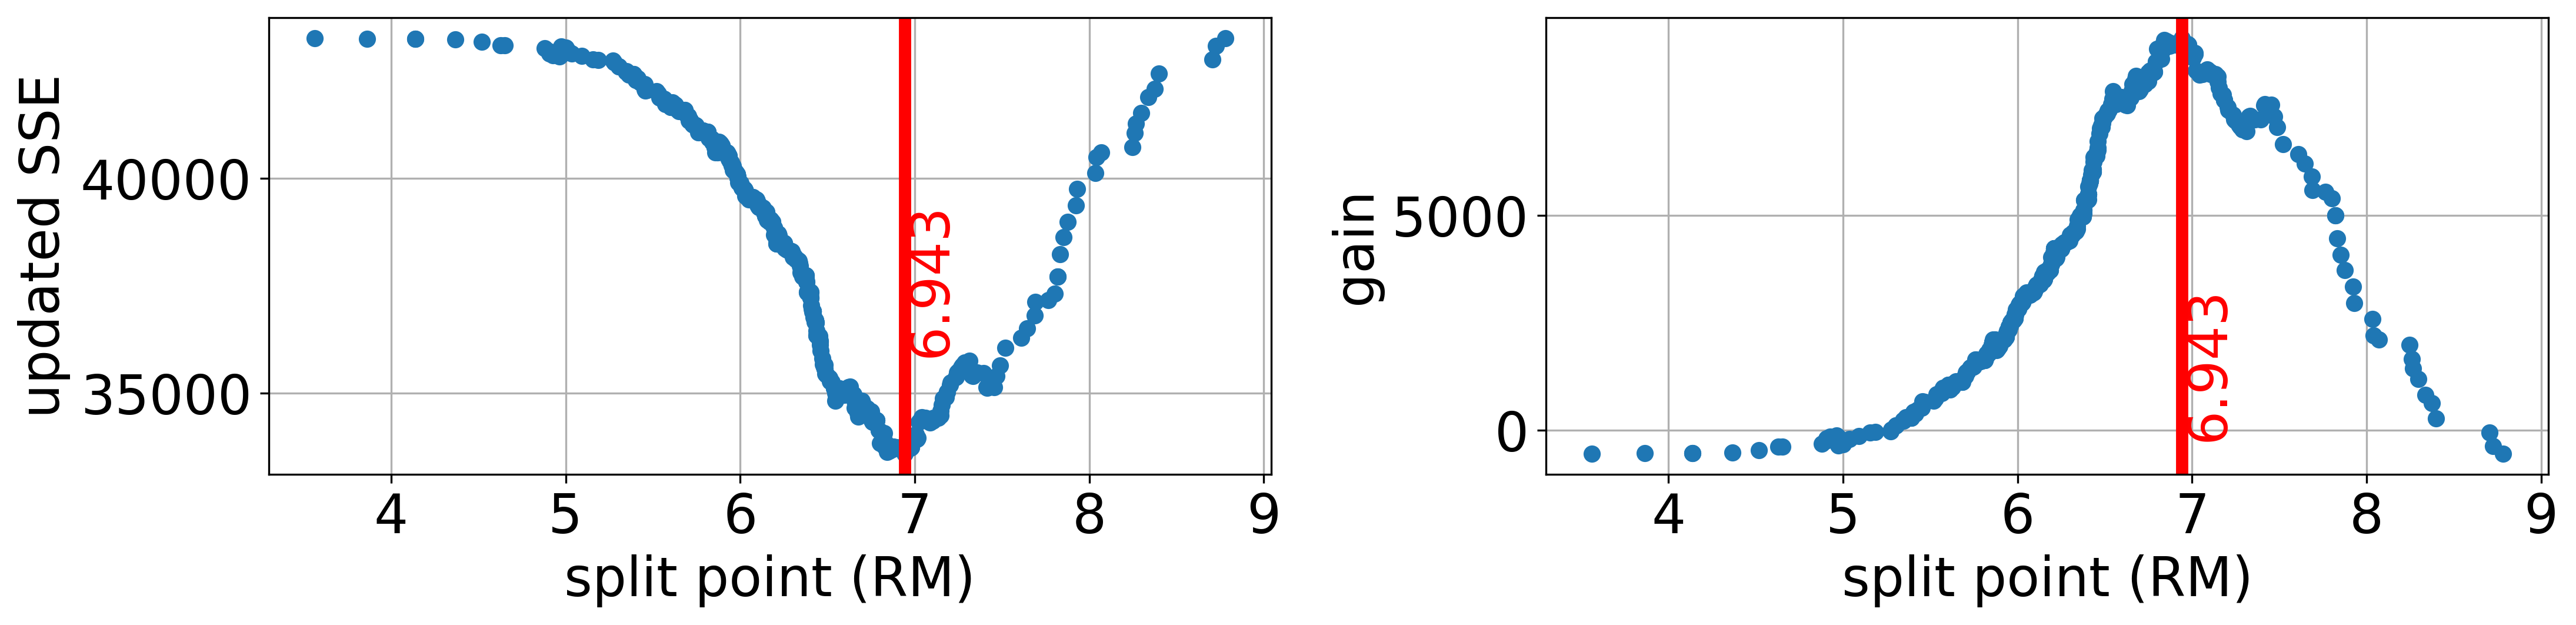

In [ ]:
#-- slide 12
# Calucate SSE and Gain for the first split
y_hat_0 = np.mean(y_train)
Q_0 = np.sum(np.square(y_train - y_hat_0))

updated_SSE = np.zeros(len(y_train))
for i, s in enumerate(RM):
    y_R1 = y_train[np.argwhere(RM < s)]
    y_hat_R1 = np.mean(y_R1)
    Q1 = np.sum(np.square(y_R1 - y_hat_R1))

    y_R2 = y_train[np.argwhere(RM >= s)]
    y_hat_R2 = np.mean(y_R2)
    Q2 = np.sum(np.square(y_R2 - y_hat_R2))

    updated_SSE[i] = Q1 + Q2

gain_s = Q_0 - updated_SSE
sp = RM[np.argmin(updated_SSE)] # optimal split point

fig, axs = plt.subplots(1,2, dpi=300)
fig.set_size_inches(15,4)
axs[0].plot(RM, updated_SSE,'o')
axs[0].set(xlabel='split point (RM)', ylabel='updated SSE')
axs[1].plot(RM, gain_s,'o')
axs[1].set(xlabel='split point (RM)', ylabel='gain')
axs[0].grid()
axs[1].grid()


axs[0].axvline(x=sp, color='r', linewidth=5)
axs[0].text(sp,min(updated_SSE)+2500,f"{sp[0]:.3f}",rotation=90, color='r')

axs[1].axvline(x=sp, color='r', linewidth=5)
axs[1].text(sp,0,f"{sp[0]:.3f}",rotation=90, color='r')
plt.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12b73f9a-5dd8-43d6-99ee-0bde04bee819' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>